# Data Visualization - Part 2

So far, when making data visualizations, we have been using `matplotlib` or `seaborn` functions to make a single graph within a figure. 

In `matplotlib` a *figure* is an object that acts as a container for all plot elements. *Axes* are objects that act as the bounds of plot elements. When creating graphs using `matplotlib` or `seaborn`, a figure with 1x1 axes is automatically created. 

In this lecture, we will explore visualizing multiple datasets on more than one axes, as well as overlaying data on one plot.

Per usual, import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## Line Graph: plotting multiple datasets

Overlaying multiple line graphs is an easy way to view how trends in multiple datasets relate to one another. We will examine trends in minimum wages using data from the U.S. Department of Labor:

In [2]:
wages = pd.read_csv('../datasets/Minimum_Wage_Data.csv')
wages.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8


The `wages` dataset includes the minimum wage for each state from 1968 to 2020, as well as the federal minimum wage during this time period. 

Let's examine the growth patterns of the minimum wage rate for 3 states over this time period: Georgia, Connecticut, and Oregon. First, let's make separate dataframes for data pertaining to each state:

In [3]:
GA = wages.loc[(wages['State'] == 'Georgia')]
CT = wages.loc[(wages['State'] == 'Connecticut')]
OR = wages.loc[(wages['State'] == 'Oregon')]

To readily plot this as a line graph, we can construct our dataframes such that the x-variable (i.e., the year) is set as the index and the y-variable (i.e. the state minimum wage) is the only column in the dataframe. In this way, the dataframe can be passed as is into `plt.plot()`

In [4]:
GA.set_index('Year', inplace=True)
GA_2020 = GA[['State.Minimum.Wage']]
GA_2020.head()

#CT.set_index('Year', inplace=True)
#CT_2020 = CT[['State.Minimum.Wage']]

#OR.set_index('Year', inplace=True)
#OR_2020 = OR[['State.Minimum.Wage']]

,State.Minimum.Wage
Year,
1968,0.00
1969,0.00
1970,0.00
1971,0.00
1972,1.25


As always, we add the proper annotation to the graph:

NameError: name 'CT_2020' is not defined

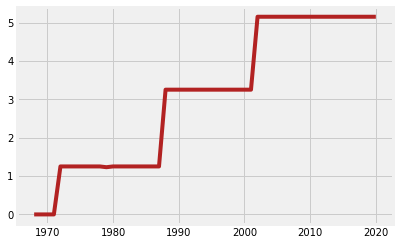

In [5]:
plt.plot(GA_2020, color = 'firebrick') # Plots the Georgia data
plt.plot(CT_2020, color = 'magenta')   # Plots the Connecticut data
plt.plot(OR_2020, color = 'teal')      # Plots the Oregon data

plt.legend(['Georgia', 'CT', 'OR'])                              # legend added
plt.title('Minimum Wage in GA, CT, and OR (1968 - 2020)')        # title added
plt.ylabel('USD (in 2020 dollars)')                              # y-labels added
plt.xlabel('Year')                                               # x-labels added
plt.show()

Here, we can see the trends of three different datasets all on one plot. With a bit of alteration, we can also plot these same three datasets as separate graphs. 

To do this, we first define our figure and our axes. We will define our figure as `fig` and define 3 axes (`ax1`, `ax2`, and `ax3`) in a tuple. These variables will be assigned to a figure object created by `plt.subplots()` that includes 1 row of 3 columns of axes.

Then, on each axis, we can plot the data. Each axis can have it's own scale to fit the data:

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(GA_2020, color = 'firebrick')

ax2.plot(CT_2020, color = 'magenta')

ax3.plot(OR_2020, color = 'teal')

plt.show()

These plots are alright, but we can improve it by increasing the width and allowing for more space to see the granularity of the x-axis by using the `figsize` and `sharey` parameters of `plt.subplots()`.

We can also improve our plot by using the `fig.suptitle()`, `fig.supxlabel()`, and `fig.supylabel()` functions, as well as the `.set_title()`, `.set_ylabel()`, and `.set_ylim()` methods. These methods can be applied to individual axes to make each subplot.


<u>Useful parameters for `plt.subplots()`</u>
- `figsize`: determines the width and length of the figure (in inches)
- `sharey`: creates a common y-axis amongst all plots; an parallel to the `sharex` parameter


---
<u>Additional features for plots:</u>

- `ax.set_title()`: sets the title for each subplot
- `ax.set_ylim()`: sets the limits of the y-axis for each subplot
- `fig.suptitle()`: sets the title for the entire figure
- `fig.supxlabel()`: sets the x-axis label for the entire figure
- `fig.supylabel()`: sets the y-axis label for the entire figure
---

NameError: name 'CT_2020' is not defined

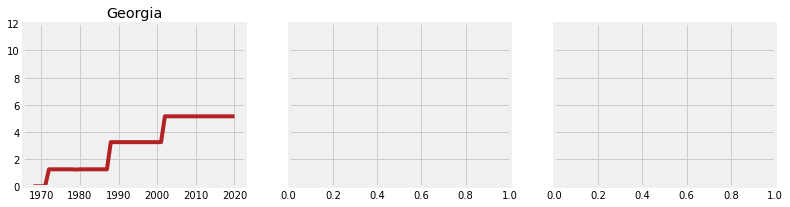

In [6]:
(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 3),  sharey= True)

# plots on the first axis - ax1
ax1.plot(GA_2020, color = 'firebrick') # plots data for GA
ax1.set_title('Georgia')               # sets title for the subplot
ax1.set_ylim([0, 12])                  # sets the limits of the y-axis for the subplot

# plots on the second axis - ax2
ax2.plot(CT_2020, color='magenta')     # plots data for CT
ax2.set_title('Conneticut')            # sets title for the subplot
ax2.set_ylim([0, 12])                  # sets the limits of the y-axis for the subplot

#plots on the third axis - ax3
ax3.plot(OR_2020, color='teal')        # plots data for OR
ax3.set_title('Oregon')                # sets title for the subplot
ax3.set_ylim([0, 12])                  # sets the limits of the y-axis for the subplot

fig.suptitle('Minimum wage from 1980 - 2020 in GA, CT, and OR', y=1.1, fontsize=15) # sets title for entire figure
fig.supxlabel('Years', y = -0.15)                                                   # sets x-label for entire figure
fig.supylabel('USD (in 2020 dollars)')                                              # sets y-label for entire figure

plt.show()

## Histograms: plotting multiple datasets

Being able to see multiple distributions in one setting is a frequent need in data science. 

We will use `sns.load_dataset()` to acquire a preformed dataset to make our histograms.

A link to additional datasets you can explore can be found in the references below. We will learn how to overlay histograms and plot them separately within the same figure using the `iris` dataset:

In [7]:
iris = sns.load_dataset('iris')

iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Remembering that histograms are used to visualize counts and frequencies within numeric data, we can see in `iris` that there are several columns whose distributions we can visualize. Let's examine the minimum and maximum values in of each variable in the dataset using the `.describe()` method:

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The `.describe()` method reveals that all values of sepal length and sepal width are between 2 and 8. With this, we can make bins that could be used acrossed both distributions.

<u>Useful parameters for `plt.hist()`</u>
- `x`: an array of values to be binned and plotted
- `bins`: an array of values that set the ranges of each bin **or** a single number that determines the number of bins
- `label`: annotates the the data
- `alpha`: **controls the opacity of each distribution**
- `color`: colors the distribution

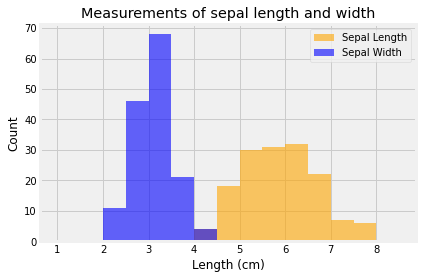

In [9]:
binz = np.arange(1,9, step = 0.5)

# plotting the sepal length
plt.hist(x = iris['sepal_length'],  bins=binz, label='Sepal Length', alpha=0.6, color = 'orange',)

# plotting the sepal width
plt.hist(x = iris['sepal_width'], bins=binz, label='Sepal Width', alpha=0.6, color = 'blue')

plt.legend(loc='upper right')                               # legend added
plt.title('Measurements of sepal length and width')         # title added
plt.xlabel('Length (cm)')                                   # x-labels added
plt.ylabel('Count')                                         # y-labels added
plt.show()


Alternatively, we can view these distributions on separate subplots. By creating our figure and axes again, we can plot to each axis using the `.hist()` method. 

Similar to before, each subplot gets it's own title and axis labels. If we don't set `binz` as our bins for each plot, the bins will be automatically generated based on the distribution of the data. This results in the x-axis of each plot having different increments:

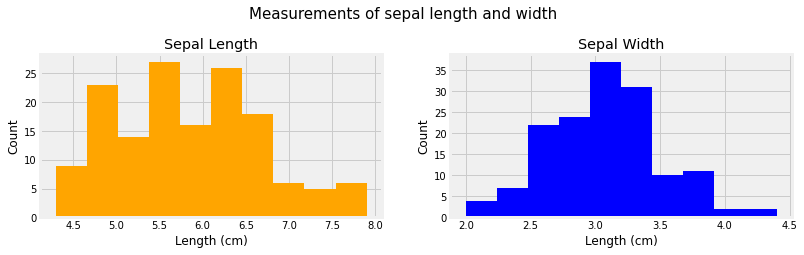

In [10]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 3))

# graphs on the first axis - ax1
ax1.hist(iris['sepal_length'], color = 'orange') # plots data for sepal length
ax1.set_title('Sepal Length')                    # makes title for the subplot
ax1.set_xlabel('Length (cm)')                    # sets x-label for the subplot
ax1.set_ylabel('Count')                          # sets y-label for the subplot

# graphs on the second axis - ax2
ax2.hist(iris['sepal_width'], color = 'blue')    # plots data for sepal length
ax2.set_title('Sepal Width')                     # makes title for the subplot
ax2.set_xlabel('Length (cm)')                    # sets x-label for the subplot
ax2.set_ylabel('Count')                          # sets y-label for the subplot

fig.suptitle('Measurements of sepal length and width', y=1.1, fontsize=15) # sets title for the entire figure

plt.show()

Above we made a figure with two histograms side-by-side by passing 1 and 2 (in this order) as arguments into the `plt.subplots()` function.

**If we pass 2 and 1 (in this order) into `plt.subplots()`, what do you think that will do?**

<u>Useful parameters for `plt.subplots()`</u>
- `gridspec_kw`: modifies the grid layout in the subplots; accepted arguments include dictionary keywords for the GridSpec class (see references)


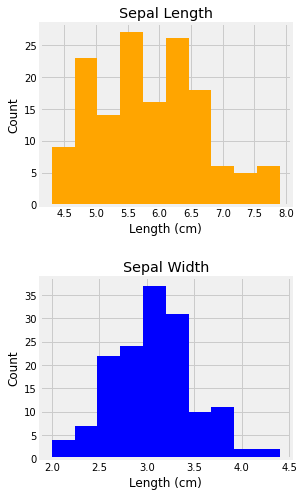

In [11]:
(fig, (ax1, ax2)) = plt.subplots(2,1, figsize=(4, 8), gridspec_kw={'hspace':0.4}) # take out the gridspec_kw
                                                                                  # parameter and see what happens!

# graphs on the first axis - ax1
ax1.hist(iris['sepal_length'], color = 'orange') # plots data for sepal length
ax1.set_title('Sepal Length')                    # makes title for the subplot
ax1.set_xlabel('Length (cm)')                    # sets x-label for the subplot
ax1.set_ylabel('Count')                          # sets y-label for the subplot

# graphs on the second axis - ax2
ax2.hist(iris['sepal_width'], color = 'blue')    # plots data for sepal length
ax2.set_title('Sepal Width')                     # makes title for the subplot
ax2.set_xlabel('Length (cm)')                    # sets x-label for the subplot
ax2.set_ylabel('Count')                          # sets y-label for the subplot

plt.show()

## Bar graph: plotting multiple datasets (nested bar graph)

Plotting multiple datasets using a bar graph makes for easy comparison across different categories. To practice will be using the `tips` dataset:

In [12]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


The `tips` dataset has several variables that are measured. Let's examine the average amount of tips given to male and female servers during lunch and dinner. We will need to group our data:

In [13]:
tips_sub = tips.groupby(['time','sex'])[['tip']].mean()
tips_sub.reset_index(inplace=True)
tips_sub

,time,sex,tip
0,Lunch,Male,2.882121
1,Lunch,Female,2.582857
2,Dinner,Male,3.144839
3,Dinner,Female,3.002115


<u>Useful parameters for `sns.barplot()`</u>
- `data`: dataframe or array containing data to be plotted
- `x`: variable of data to plot on the x-axis
- `y`: variable of data to plot on the y-axis
- `hue`: **dictates how the bars are colored, based on a categorical value**
- `dodge`: **When hue nesting is used, whether elements should be shifted along the categorical axis.**
- `palette`: **color palette to be used to color plotted variables**

In [ ]:
sns.barplot(data=tips_sub, x="time", y="tip", hue="sex", dodge=True,  palette='turbo')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Average tips during lunch and dinner between males and females')
plt.show()

## Bar graph: coloring bars by a categorical variable

We can also color bars of a non-nested bar graph (i.e., a bar graph that plots a single categorical variable)

Let's plot the maximum tip value for each day within the `tips` dataset. First, we must group our dataset accordingly and apply the appropriate statistical method:

In [ ]:
days = tips.groupby(['day'])[['tip']].max()
days.reset_index(inplace=True)
days

Before plotting, it will helpful to make a custom color palette.

This can be done by creating a list of colors (either `matplotlib` named colors or hexadecimal codes) and using that list as input for `sns.set_palette()`.

In [ ]:
colors = ["skyblue", '#5faebf', '#82a73f', 'green']
pal = sns.set_palette(colors)

Using our new color palette and `sns.barplot()`, we will plot the maximum tip amount for each day and color each bar accordingly.

Because we are not making a nested bar graph, the `dodge` parameter is set to `False`. The bars will be colored based on the input into the `palette` parameter.

In [ ]:
sns.barplot(data = days, x = 'day', y = 'tip', 
            hue="day", dodge=False, palette=pal)           # color bars based on day using the custom color palette

plt.legend(labelcolor="black", bbox_to_anchor=(1, 1.01))   # customizes the legend
plt.xticks([])                                             # gets rid of x-labels
plt.title('Maximum tips per day')                          # title added
plt.show()

## Scatter plot: coloring data points by a categorical variable

We previously learned how to make scatter plots in `matplotlib` and color data points by a categorical variable. 

There is a more straightforward way to do this using `sns.scatterplot()`. Using the `iris` dataset, we will practice this.

<u>Useful parameters for `sns.histplot()`</u>
- `data`: dataframe or array containing data to be plotted
- `x`: variable of data to plot on the x-axis
- `y`: variable of data to plot on the y-axis
- `hue`: **dictates how the data points are colored, based on a categorical value**
- `palette`: **color palette to be used to color plotted variables**
- `s`: size of each data point

In [ ]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette = "Set2", s=50)  

plt.legend(ncol = 1, labelcolor="black", bbox_to_anchor=(1, 1.01))    # legend added

plt.title('Sepal width vs sepal length in various species')           # title added
plt.show()

In [14]:
display(tips, iris)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
help(display)

Help on function display in module IPython.core.display_functions:

display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)
    Display a Python object in all frontends.
    
    By default all representations will be computed and sent to the frontends.
    Frontends can decide which representation is used and how.
    
    In terminal IPython this will be similar to using :func:`print`, for use in richer
    frontends see Jupyter notebook examples with rich display logic.
    
    Parameters
    ----------
    *objs : object
        The Python objects to display.
    raw : bool, optional
        Are the objects to be displayed already mimetype-keyed dicts of raw display data,
        or Python objects that need to be formatted before display? [default: False]
    include : list, tuple or set, optional
        A list of format type strings (MIME types) to include in the
        format data dict. If this is set *only* 

## References
- <a href="https://github.com/mwaskom/seaborn-data">preloaded datasets in seaborn</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html">info on matplotlib.gridspec.GridSpec class</a>
- <a href="https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.SubplotParams">SubplotParams for the GridSpec</a>
